In [1]:
# **Imports**
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler

from statsmodels.tsa.statespace.sarimax import SARIMAX

In [2]:
#from google.colab import drive
#drive.mount('/content/drive')

# Loading and Preparing the data

## Loading the Data 

In [3]:
# uploading the files to GC in order to use them. If you use the file in GCP more often, use a DIFFERENT method like connecting to your Drive, like shown below.
#from google.colab import files
#uploaded1 = files.upload()

In [4]:
#uploaded2 = files.upload()

In [5]:
local_path_target = '/mnt/g/Meine Ablage/raw_data/Target/Hourly/energy_generation_data/df_deutschland.csv'

local_path_feature = "/mnt/g/Meine Ablage/raw_data/Features/DATAFRAMES/hourly_globalradiation_df.csv"

data_target = pd.read_csv(local_path_target)
data_feature = pd.read_csv(local_path_feature)

#data_target = pd.read_csv('/content/drive/MyDrive/raw_data/Target/Hourly/energy_generation_data/df_deutschland.csv')
#data_feature = pd.read_csv('/content/drive/MyDrive/raw_data/Features/DATAFRAMES/hourly_globalradiation_df.csv', index_col=0)

data_target['Date'] = pd.to_datetime(data_target.Date)

In [6]:
generation_df = data_target.groupby(by=data_target['Date']).sum()
generation_df.head(3)

,Wind offshore[MWh],Wind onshore[MWh],Photovoltaics[MWh]
Date,,,
2015-01-01 00:00:00,517.0,8129.0,0.0
2015-01-01 01:00:00,516.0,8300.0,0.0
2015-01-01 02:00:00,514.0,8544.0,0.0


In [7]:
wind_df = generation_df[['Wind offshore[MWh]','Wind onshore[MWh]']].sum(axis=1)
wind_df.head(3)

Date
2015-01-01 00:00:00    8646.0
2015-01-01 01:00:00    8816.0
2015-01-01 02:00:00    9058.0
dtype: float64

In [13]:
wind_onshore_df = generation_df["Wind onshore[MWh]"]
wind_onshore_df.head(3)

Date
2015-01-01 00:00:00    8129.0
2015-01-01 01:00:00    8300.0
2015-01-01 02:00:00    8544.0
Name: Wind onshore[MWh], dtype: float64

In [14]:
wind_offshore_df = generation_df["Wind offshore[MWh]"]
wind_offshore_df.head(3)

Date
2015-01-01 00:00:00    517.0
2015-01-01 01:00:00    516.0
2015-01-01 02:00:00    514.0
Name: Wind offshore[MWh], dtype: float64

In [8]:
data_feature.tail(3)

,Date,164,183,198,232,282,342,427,430,433,...,6197,7351,7367,7368,7369,7370,7374,13674,15000,15818
11661,2021-04-30 21:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
11662,2021-04-30 22:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
11663,2021-04-30 23:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Statistical Exploration

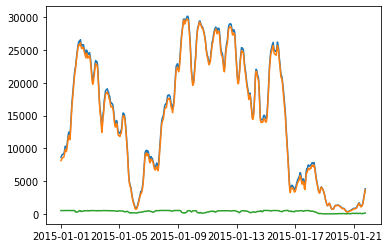

In [16]:
plt.plot(wind_df[:500])
plt.plot(wind_onshore_df[:500])
plt.plot(wind_offshore_df[:500])

<AxesSubplot:>

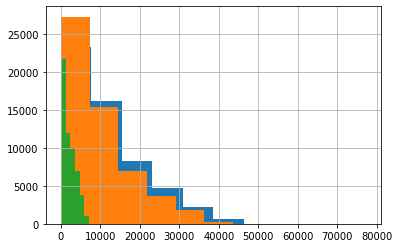

In [18]:
wind_df.hist()
wind_onshore_df.hist()
wind_offshore_df.hist()

In [19]:
# p-value (should be less than 0.05 to be sattionary)
from statsmodels.tsa.stattools import adfuller
adfuller(wind_df)[1], adfuller(wind_onshore_df)[1], adfuller(wind_offshore_df)[1]

(7.922097108950382e-30, 4.6242738858550056e-30, 1.7119979669373981e-28)

In [13]:
# Analyzing seasonality and 

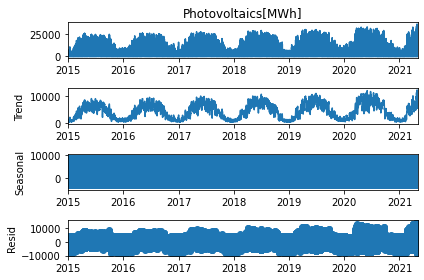

In [14]:
from statsmodels.tsa.seasonal import seasonal_decompose

result_add_wind = seasonal_decompose(solar_df, model='additive')
result_add.plot()
result_add_wind = seasonal_decompose(solar_df, model='additive')
result_add.plot()
result_add_wind = seasonal_decompose(solar_df, model='additive')
result_add.plot();

# Preparing the Data




### Concatenating the Data

In [15]:
solar_df.drop(solar_df.head(solar_df.shape[0]-data_feature.shape[0]).index,inplace=True)

In [16]:
# Building one DataFrame to make the correlation Analysis

complete_df = pd.concat([solar_df, data_feature.set_index(solar_df.index)], axis=1)
complete_df.shape

(11664, 121)

### Filtering the data with highly correlated timeseries Optional 

In [17]:
# Correlation Analysis
#complete_df.corr()

In [18]:
df_corr = complete_df.corr().abs()

In [19]:
df_corr

,Photovoltaics[MWh],164,183,198,232,282,342,427,430,433,...,6197,7351,7367,7368,7369,7370,7374,13674,15000,15818
Photovoltaics[MWh],1.000000,0.781508,0.780628,0.839778,0.830101,0.845172,0.813199,0.800804,0.794589,0.791675,...,0.829469,0.776425,0.808242,0.845927,0.281130,0.809716,0.846881,0.873554,0.864202,0.023892
164,0.781508,1.000000,0.899513,0.876090,0.839640,0.850496,0.833806,0.941742,0.946814,0.928458,...,0.859577,0.949607,0.851946,0.864590,0.247835,0.826521,0.851666,0.848919,0.844615,0.018547
183,0.780628,0.899513,1.000000,0.840640,0.813387,0.827059,0.820424,0.881467,0.886795,0.858027,...,0.847147,0.902628,0.825470,0.839218,0.216594,0.799182,0.846185,0.834866,0.836177,0.011232
198,0.839778,0.876090,0.840640,1.000000,0.865342,0.904928,0.859467,0.895249,0.894762,0.883955,...,0.903108,0.859744,0.890518,0.941870,0.276545,0.863922,0.876235,0.889968,0.881841,0.032900
232,0.830101,0.839640,0.813387,0.865342,1.000000,0.902834,0.801335,0.849465,0.843752,0.842224,...,0.839016,0.826825,0.815335,0.878821,0.305669,0.894854,0.835375,0.910070,0.851534,0.033377
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7370,0.809716,0.826521,0.799182,0.863922,0.894854,0.904904,0.801545,0.842155,0.836392,0.839663,...,0.829670,0.807996,0.806754,0.874866,0.266960,1.000000,0.813704,0.882354,0.833913,0.033544
7374,0.846881,0.851666,0.846185,0.876235,0.835375,0.865292,0.900189,0.859910,0.860118,0.850372,...,0.910855,0.857136,0.879187,0.880212,0.255169,0.813704,1.000000,0.874462,0.917821,0.008949
13674,0.873554,0.848919,0.834866,0.889968,0.910070,0.926497,0.846657,0.866184,0.861768,0.858877,...,0.877869,0.841935,0.853509,0.911956,0.261014,0.882354,0.874462,1.000000,0.899300,0.030639
15000,0.864202,0.844615,0.836177,0.881841,0.851534,0.881167,0.876804,0.857512,0.851888,0.847752,...,0.905574,0.846230,0.881077,0.900687,0.242331,0.833913,0.917821,0.899300,1.000000,0.013615


In [20]:
sorted_corr = df_corr.iloc[0].sort_values(ascending=False)
pd.DataFrame(sorted_corr)

,Photovoltaics[MWh]
Photovoltaics[MWh],1.000000
13674,0.873554
4177,0.866014
3660,0.866013
15000,0.864202
...,...
5142,0.758694
3946,0.634170
656,0.339278
7369,0.281130


In [21]:
list_of_corr_060 = list(sorted_corr[sorted_corr >= 0.6].index)

In [22]:
filtered_df = complete_df[list_of_corr_060]

In [23]:
filtered_df

,Photovoltaics[MWh],13674,4177,3660,15000,4336,460,5100,5906,3098,...,183,1605,1684,7351,5792,1757,1503,4104,5142,3946
Date,,,,,,,,,,,,,,,,,,,,,
2020-01-01 00:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-01-01 01:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-01-01 02:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-01-01 03:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-01-01 04:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-04-30 19:00:00,1104.0,0.0,0.0,0.0,0.0,0.0,0.0,0.1,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2021-04-30 20:00:00,111.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2021-04-30 21:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Scaling the Data

In [24]:
scaler = MinMaxScaler()
scaled = scaler.fit_transform(filtered_df)

In [174]:
scaler_y = MinMaxScaler()
scaled_y = scaler_y.fit_transform(pd.DataFrame(solar_df))

In [ ]:
np.asmatrix(scaled)

matrix([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]])

## Forming the Sequences for RNN

# Sarimax Model

## Forming sequences

In [232]:
test_length = 336

In [233]:
# Train_Data
trainX2 = scaled[:int(len(scaled)-test_length),:]
trainy2 = scaled_y[:int(len(scaled)-test_length),:]
# validation Data
testX2 = scaled[int(len(scaled)-test_length):,:]
testy2 = scaled_y[int(len(scaled)-test_length):,:]

## Training and predicting with the Model

In [234]:
# Findng the Hyp
#import pmdarima as pm

#smodel = pm.auto_arima(trainy, m=12, X=trainX,
                       #start_p=0, max_p=2,
                       #start_q=0, max_q=5,
                       #max_P=2, max_D=1,max_Q=2,
                       #seasonal=True,
                       #trace=True)

In [235]:
# Order Parameters of best model with exog wind speed and hourly data, non logarithmic data
bm_order = (0,1,0)
# could choose also 24  because sun always has a daily cycle
bm_seasonal_order = (0,0,0,24)

In [236]:
# The model
sarimax = SARIMAX(endog=trainy2, exog=trainX2, order=bm_order, seasonal_order=bm_seasonal_order ).fit()

/home/hauke/.pyenv/versions/3.8.6/envs/predict_energy_generation/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [237]:
#Forecasting
y_pred = sarimax.forecast(testy2.shape[0], exog=testX2, alpha=0.05)

## Unscaling results

In [238]:
unscaling_array_2 = scaled_y[:len(scaled_y)-y_pred.shape[0]]

In [239]:
unscaling_array_tog = np.append(unscaling_array_2,y_pred.flatten().reshape(-1,1), axis=0)

In [240]:
unscaled_results = scaler_y.inverse_transform(unscaling_array_tog)

## MSE & PLot of results

In [163]:
def mae(y_true, y_pred):
    y_true = np.array(y_true)
    y_pred = np.array(y_pred)
    return np.sum(np.abs(y_true-y_pred))/(len(y_true))

def mse(y_true, y_pred):
    y_true = np.array(y_true)
    y_pred = np.array(y_pred)
    return np.mean((y_true-y_pred)**2)

def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [241]:
def plot_forecast(fc, train, test, upper=None, lower=None):
    is_confidence_int = isinstance(upper, np.ndarray) and isinstance(lower, np.ndarray)
    # Prepare plot series
    fc_series = pd.Series(fc, index=test.index)
    lower_series = pd.Series(upper, index=test.index) if is_confidence_int else None
    upper_series = pd.Series(lower, index=test.index) if is_confidence_int else None

    # Plot
    plt.figure(figsize=(20,8), dpi=100)
    plt.plot(train, label='training', color='black')
    plt.plot(test, label='actual', color='black', ls='--')
    plt.plot(fc_series, label='forecast', color='orange')
    if is_confidence_int:
        plt.fill_between(lower_series.index, lower_series, upper_series, color='k', alpha=.15)
    plt.title('Forecast vs Actuals')
    plt.legend(loc='upper left', fontsize=8);

In [242]:
trainy.shape, valy.shape,y_pred.shape

((9331, 1), (2241, 1), (336,))

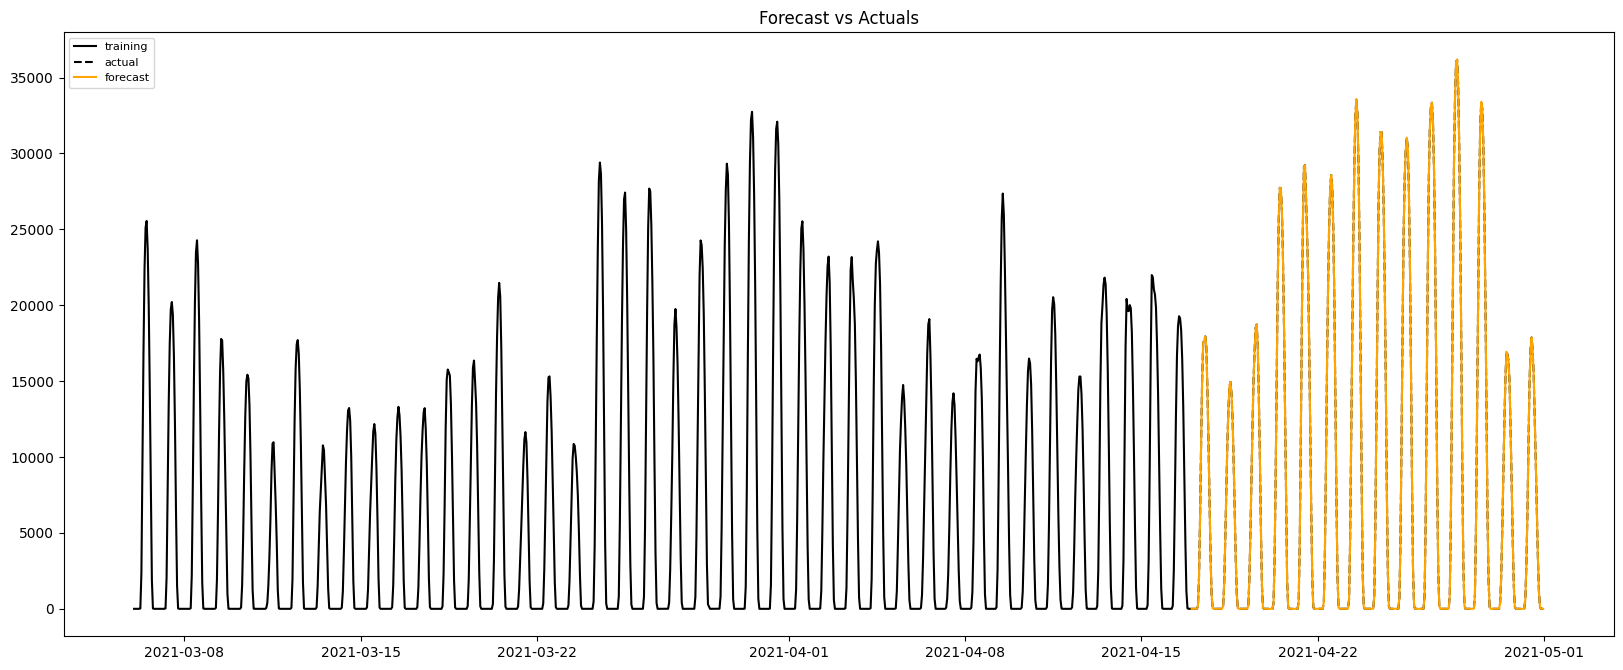

In [243]:
plot_forecast(unscaled_results[len(unscaled_results)-test_length:].flatten()
    , solar_df[len(solar_df)-(test_length*4):len(solar_df)-test_length], solar_df[len(solar_df)-test_length:])

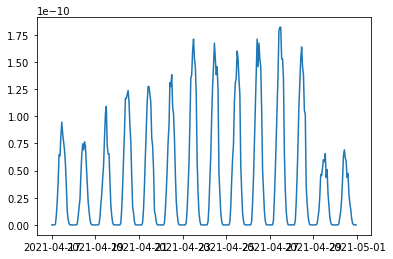

In [244]:
# plotting the residuals

plt.plot(solar_df[len(solar_df)-test_length:] - unscaled_results[len(unscaled_results)-test_length:].flatten())

In [245]:
# THE MAE
mae(solar_df[len(solar_df)-test_length:], unscaled_results[len(unscaled_results)-test_length:].flatten())

4.2182082850024436e-11

In [246]:
solar_df.mean()

4977.531721536351

Things to try out:
Splitting onshore and offshore wind generation, vary the timeframe of wind_data, excluding a lot of timeseries and just include the most representative for the region, 